# Anwendung des Satz von Bayes - Krankhheiten
Im diesen Notebook soll der Satz von Bayes mit einem Beispiel veranschaulicht werden. Im Folgenden werden wir die wollen wir die Wahrscheinlichkeit berechnen mit welcher ein Test eine bestimmte Krankheit korrekt diagnostiziert. Konkret wollen wir die Wahrscheinlichkeit $Pr(K \vert T)$ berechnen. $K$ ist das Ereignis krank zu sein und $T$ das Ereignis eines positiven Tests. Zur Lösung wird der Satz von Bayes $Pr(K \vert T) = \frac{Pr(T \vert K) \cdot Pr(K)}{Pr(T \vert K) \cdot Pr(K) + Pr(T \vert \bar{K}) \cdot Pr(\bar{K})}$ angewendet. 
Hierbei benötigen wir die Wahrscheinlichkeit $Pr(K)$ krank zu sein mit der Gegenwahrscheinlichkeit $Pr(\bar{K})$ gesund zu sein. Zudem muss berechnet werden wie wahrscheinlich ein positiver Test ist mit der Bedingung, dass jemand jeweils krank bzw. gesund ist. Diese Wahrscheinlichkeiten sind mit $Pr(T \vert K)$ bzw. $Pr(T \vert \bar{K})$ gekennzeichnet. 

Zunächst werden die benötigten Bibliotheken importiert. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Anschließend erzeugen wir einen Datensatz *D*. Mit der Variable *nPersons* kann die Anzahl der Personen verändert werden. 

In [2]:
nPersons = 100
if nPersons < 10:
    print("You have chosen a size of persons which is < 10. Hence, we set apply the default size of 100.")
    nPersons = 100
'''
Generate a dataset with test results and information about the health status.
Each row of D represents a person. The first column represents the test result.
The second column represents the status of health. Technically, a random matrix
with 0's and 1's is created with the size nPersons by 2. 

D[i, 0] == 0: negative test result
D[i, 0] == 1: positive test result
D[i, 1] == 0: healthy
D[i, 1] == 1: ill
'''
# all values of D will be 0 or 1 (binary)
D = np.random.randint(low=0, high=2, size=(nPersons,2))

def printTrueHealth(D, i):
    """
    print the true status of health of a person.
    
    Parameters:
        D (numpy.ndarray):
            Dataset where second column represents the status of health. 
    Returns:
        None
    """
    # prevent index out of array exception
    if i >= len(D[:]):
        return
    if D[i, 1] == 1:
        print("Person {0} is ill (D[{0}, 1] == 1).".format(i))
    else:
        print("Person {0} is healthy (D[{0}, 1] == 0).".format(i))

# print some test results
for i in range(nPersons):
    if i > 4:
        break
    if D[i, 0] == 1:
        print("Person {0} has tested positive (D[{0}, 0] == 1).".format(i))
        printTrueHealth(D, i)
    else:
        print("Person {0} has tested negative (D[{0}, 0] == 0).".format(i))
        printTrueHealth(D, i)

Person 0 has tested negative (D[0, 0] == 0).
Person 0 is ill (D[0, 1] == 1).
Person 1 has tested negative (D[1, 0] == 0).
Person 1 is healthy (D[1, 1] == 0).
Person 2 has tested positive (D[2, 0] == 1).
Person 2 is healthy (D[2, 1] == 0).
Person 3 has tested negative (D[3, 0] == 0).
Person 3 is healthy (D[3, 1] == 0).
Person 4 has tested negative (D[4, 0] == 0).
Person 4 is ill (D[4, 1] == 1).


Um einen Überblick über die Daten zu erhalten werden wir die Anzahl der positiven und negativen Testergebnisse ausgeben. Ebenso werden wir die Anzahl an gesunden und kranken Personen in der Population ausgeben. Anschließend werden wir die beiden Verhältnisse als Kuchendiagramme visualisieren. 

In [3]:
nNegatives = len(np.where(D[:, 0] == 0)[0])
nPositives = nPersons - nNegatives
print("{0} persons have a negative test result and {1} persons have a positive test result."
      .format(nNegatives, nPositives))
nHealthy = len(np.where(D[:, 1] == 0)[0])
nIll = nPersons - nHealthy
print("{0} Persons are healthy and {1} persons are ill.".format(nHealthy, nIll))

51 persons have a negative test result and 49 persons have a positive test result.
50 Persons are healthy and 50 persons are ill.


In [4]:
def plotPie(x, xLabel, y, yLabel, title):
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.pie([x, y],
              colors = ["red", "lightskyblue"],
              labels = [xLabel, yLabel],
              autopct = "%.1f%%",
              shadow = False,
              startangle = 90)
    plt.title(title)

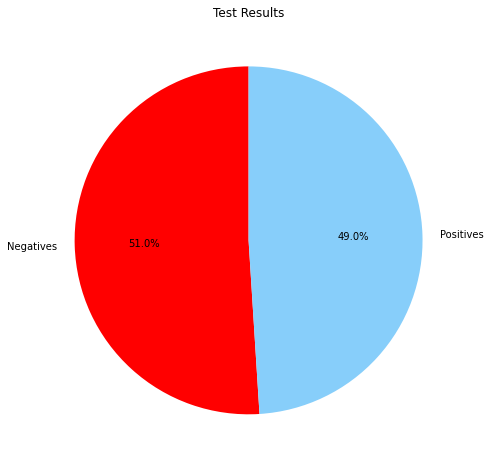

In [5]:
plotPie(x=nNegatives, xLabel="Negatives", y=nPositives, yLabel="Positives", title="Test Results")
plt.show()

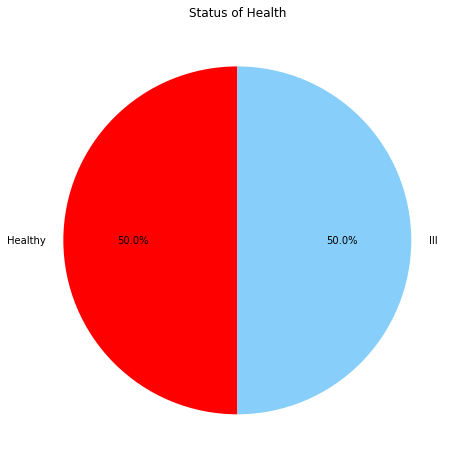

In [6]:
plotPie(x=nHealthy, xLabel="Healthy", y=nIll, yLabel="Ill", title="Status of Health")
plt.show()

Die Wahrscheinlichkeit mit der die Krankheit auftritt wird Prävalenz bezeichnet. Konkret werden wir somit die Größen $Pr(K)$ und $Pr(\bar{K})$ berechnen, welche im Code mit *probIll* und *probHealthy* bezeichnet sind. 

In [7]:
# Pr(not K)
probHealthy = nHealthy / nPersons
# Pr(K)
probIll = 1 - probHealthy
print("The probability of meeting a healthy person is {0} and the probability of meeting an ill person is {1}."
      .format(probHealthy, probIll))

The probability of meeting a healthy person is 0.5 and the probability of meeting an ill person is 0.5.


Im nächsten Codeabschnitt bestimmen wir die Personen mit einem positiven Testergebnis. Diese benötigen wir um zu ermitteln, welche Personen davon gesund bzw. krank sind. Im ersten Fall sind die Personen gesucht, welche gesund sind und ein positives Testergebnis hatten. D.h. wir müssen zwischen diesen beiden Mengen den Schnitt berechnen. 

In [8]:
# determine all persons that had a positive test result.
personsPositive = np.where(D[:, 0] == 1)[0]
if nPositives >= 5:
    print("Persons with a positive test result are for example: {0}".format(personsPositive[:5]))

Persons with a positive test result are for example: [ 2  5  6 10 11]


Nun wollen wir die Wahrscheinlichkeit das ein Test positiv ausfällt unter der Bedingung berechnen, dass jemand gesund ist. Formal wird die Wahrscheinlichkeit mit $Pr(T \vert \bar{K})$ angegeben. Der oben erwähnte Schnitt wird mit der numpy Funktion *intersect1d* berechnet. 

In [9]:
# determine all healthy persons.
personsHealthy = np.where(D[:, 1] == 0)[0]
if nHealthy >= 5:
    print("Healthy persons are for example: {0}".format(personsHealthy[:5]))

personsHealthyPositive = np.intersect1d(personsPositive, personsHealthy)
nHealthyPositive = len(personsHealthyPositive)
if nHealthyPositive >= 5:
    print("Persons that are healthy and had a positive test result are for example: {0}"
          .format(personsHealthyPositive[:5]))
print("In total, {0} out of {1} persons are healthy and had a positive test result"
      .format(nHealthyPositive, nHealthy))
# Pr(T|not K)
probHealthyPositive = nHealthyPositive / nHealthy
print("The probability that a healthy person gets a positive test result is: {0}".format(probHealthyPositive))

Healthy persons are for example: [1 2 3 5 6]
Persons that are healthy and had a positive test result are for example: [ 2  5  6 16 24]
In total, 24 out of 50 persons are healthy and had a positive test result
The probability that a healthy person gets a positive test result is: 0.48


Die Wahrscheinlichkeit $Pr(T \vert K)$ wird analog zu dem obigen Abschnitt berechnet. 

In [10]:
# determine all healthy persons.
personsIll = np.where(D[:, 1] == 1)[0]
if nIll >= 5:
    print("Ill persons are for example: {0}".format(personsIll[:5]))

personsIllPositive = np.intersect1d(personsPositive, personsIll)
nIllPositive = len(personsIllPositive)
if nIllPositive >= 5:
    print("Persons that are ill and had a positive test result are for example: {0}"
          .format(personsIllPositive[:5]))
print("In total, {0} out of {1} persons are ill and had a positive test result"
      .format(nIllPositive, nIll))
# Pr(T|K)
probIllPositive = nIllPositive / nIll
print("The probability that an ill person gets a positive test result is: {0}".format(probIllPositive))

Ill persons are for example: [0 4 7 8 9]
Persons that are ill and had a positive test result are for example: [10 11 13 18 31]
In total, 25 out of 50 persons are ill and had a positive test result
The probability that an ill person gets a positive test result is: 0.5


Zuletzt kann die gesuchte Wahrscheinlichkeit $Pr(K \vert T) = \frac{Pr(T \vert K) \cdot Pr(K)}{Pr(T \vert \bar{K}) \cdot Pr(\bar{K}) + Pr(T \vert K) \cdot Pr(K)}$ berechnet werden.

In [11]:
propPositiveIll = (probIllPositive * probIll) / ((probHealthyPositive * probHealthy) + (probIllPositive * probIll))
print("The probability that a person gets a positive test result and is really ill is: {0}".format(propPositiveIll))

The probability that a person gets a positive test result and is really ill is: 0.5102040816326531


## Aufgabe
Wie ändert sich die $Pr(K \vert T)$, wenn die Anzahl der kranken Personen variiert wird? Zur Beantwortung der Frage wird die erste Spalte des Datensatzes *D* konstant gehalten. Wir verändern nur die zweite Spalte und inkrementieren die Anzahl der kranken Personen in einer *for*-Schleife. Nutzen Sie die den Datensatz *DTmp* und die Anzahl der gesunden und kranken Personen, um wie in der obigen Erläuterung den Wert von $Pr(K \vert T)$ zu bestimmen. Jeder entsprechende Wert von $Pr(K \vert T)$ mit der Steigerung der kranken Personen wird in einer Liste gespeichert und anschließend visualisiert.

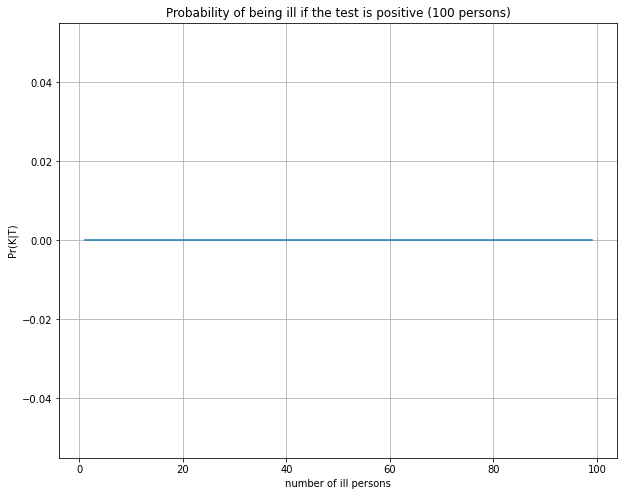

In [12]:
# persons with a positive test result
personsPositive = np.where(D[:, 0] == 1)[0]

# list to store the results
results = []
# list with number of ill persons: [1, 2, 3, ..., nPersons - 1]
nIllPersons = list(range(1, nPersons))

for i in nIllPersons:
    # copy the dataset and reset second column (all persons are healthy)
    DTmp = np.array(D, copy=True)
    DTmp[:, 1] = 0
    # set the health status of i persons to ill
    DTmp[:i, 1] = 1
    
    # number of healthy persons
    nHealthyTmp = nPersons - i
    # number of ill persons
    nIllTmp = i

    '''
    Your solution here!!!
    Hint: Feel free to define functions before this for-loop
    '''

    # TODO: Calculate the correct value for this variable (Pr(K|T))!
    propPositiveIllTmp = 0    
    '''
    End of solution!!!
    '''
    results.append(propPositiveIllTmp)

# plot the results
_, ax = plt.subplots()
ax.plot(nIllPersons, results)

ax.set(xlabel="number of ill persons", ylabel="Pr(K|T)",
       title="Probability of being ill if the test is positive ({0} persons)".format(nPersons))
ax.grid()
plt.show()
